[nltk_data] Downloading package punkt to /home/ignacio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ignacio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


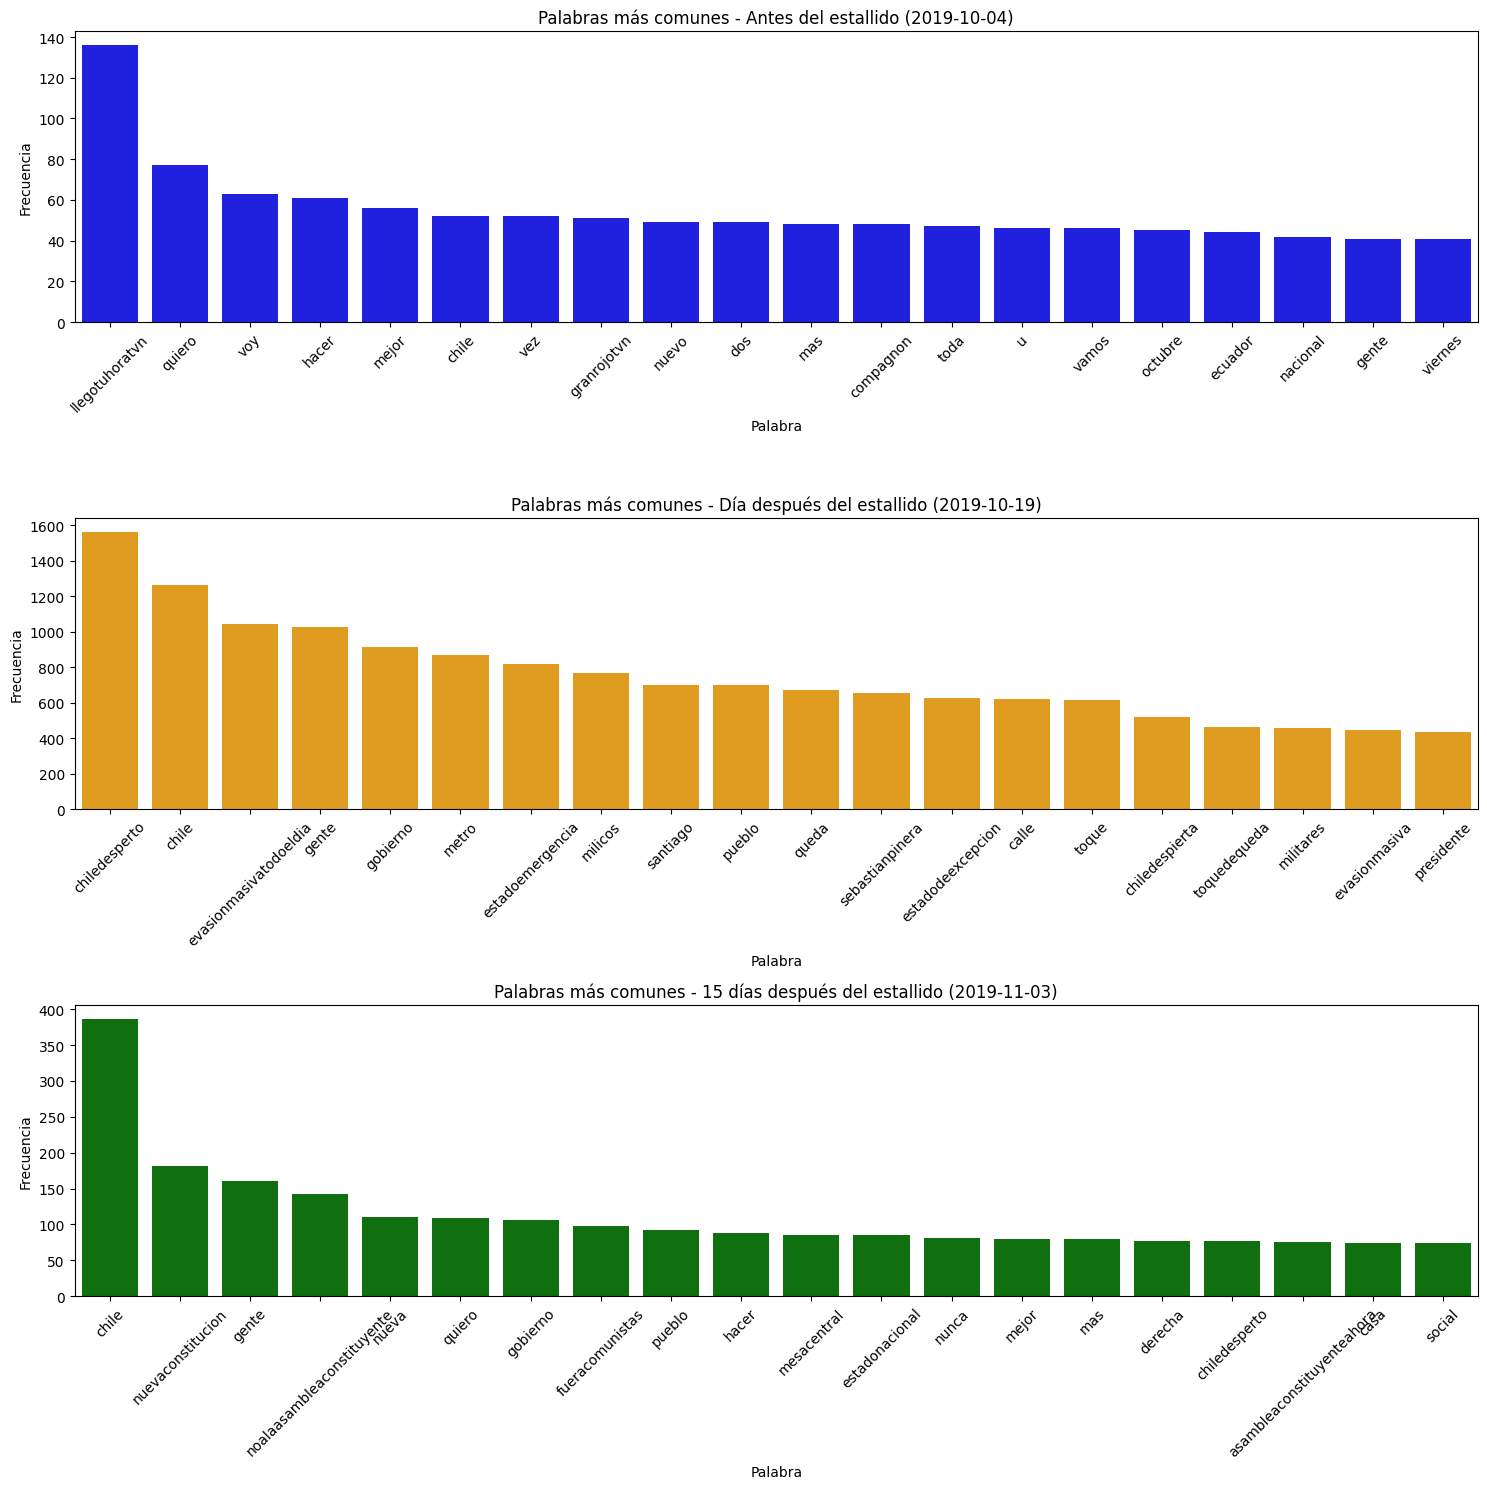

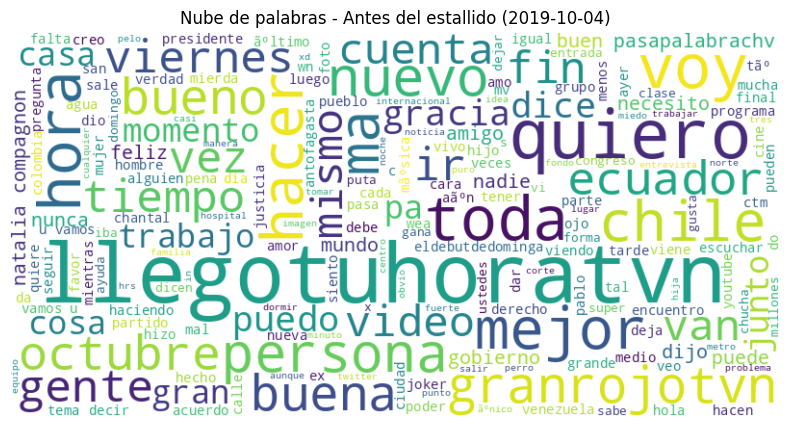

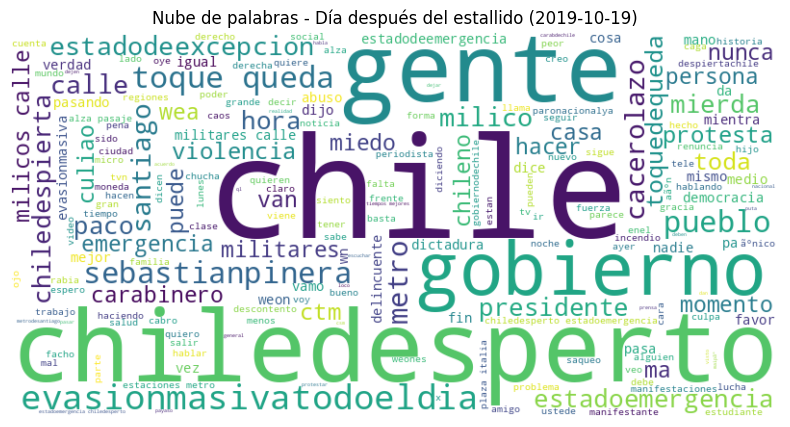

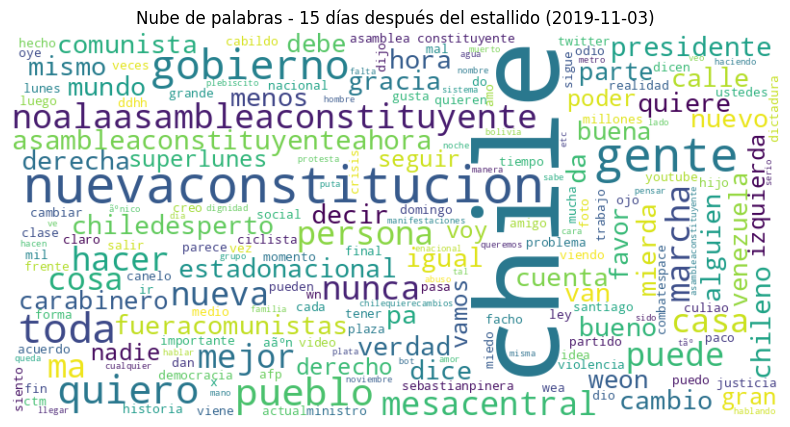

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Descargar recursos de NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Definir las palabras de parada personalizadas
custom_stopwords = set(stopwords.words('spanish')).union({
    'https', 'q', 'ahora', 'ver', 'ser', 'ella', 'vida', 'hace', 'semana', 'soy', 'tan', 'solo', 'va', 'venir', 
    'bien', 'siempre', 'hoy', 'si', 'me', 'aqui', 'esto', 'solo', 'd', 'tu', 'te', 'le', 'lo', 'su', 'nos', 
    'os', 'les', 'la', 'las', 'lo', 'los', 'ellos', 'ellas', 'est'
})

# Función para limpiar texto
def clean_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in custom_stopwords]
    return ' '.join(words)

# Cargar los archivos CSV con el delimitador y la codificación correctos
df_20191004 = pd.read_csv('./data/tweets_20191004.csv', encoding='iso-8859-1', encoding_errors='replace', sep=';')
df_20191019 = pd.read_csv('./data/tweets_20191019.csv', encoding='iso-8859-1', encoding_errors='replace', sep=';')
df_20191103 = pd.read_csv('./data/tweets_20191103.csv', encoding='iso-8859-1', encoding_errors='replace', sep=';')

# Limpiar el texto de cada DataFrame
df_20191004['cleaned_text'] = df_20191004['text'].apply(clean_text)
df_20191019['cleaned_text'] = df_20191019['text'].apply(clean_text)
df_20191103['cleaned_text'] = df_20191103['text'].apply(clean_text)

# Añadir una columna de fecha a cada DataFrame
df_20191004['date'] = '2019-10-04'
df_20191019['date'] = '2019-10-19'
df_20191103['date'] = '2019-11-03'

# Unir los DataFrames
df_combined = pd.concat([df_20191004, df_20191019, df_20191103])

# Función para obtener las palabras más comunes
def get_most_common_words(df, n=20):
    all_words = ' '.join(df['cleaned_text']).split()
    counter = Counter(all_words)
    return counter.most_common(n)

# Obtener las palabras más comunes para cada fecha
common_words_20191004 = get_most_common_words(df_20191004)
common_words_20191019 = get_most_common_words(df_20191019)
common_words_20191103 = get_most_common_words(df_20191103)

# Crear DataFrames para graficar
df_common_20191004 = pd.DataFrame(common_words_20191004, columns=['word', 'count'])
df_common_20191019 = pd.DataFrame(common_words_20191019, columns=['word', 'count'])
df_common_20191103 = pd.DataFrame(common_words_20191103, columns=['word', 'count'])

# Graficar la evolución de las palabras más comunes usando seaborn
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

sns.barplot(x='word', y='count', data=df_common_20191004, ax=axes[0], color='blue')
axes[0].set_title('Palabras más comunes - Antes del estallido (2019-10-04)')
axes[0].set_xlabel('Palabra')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='word', y='count', data=df_common_20191019, ax=axes[1], color='orange')
axes[1].set_title('Palabras más comunes - Día después del estallido (2019-10-19)')
axes[1].set_xlabel('Palabra')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='word', y='count', data=df_common_20191103, ax=axes[2], color='green')
axes[2].set_title('Palabras más comunes - 15 días después del estallido (2019-11-03)')
axes[2].set_xlabel('Palabra')
axes[2].set_ylabel('Frecuencia')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Crear nubes de palabras
def generate_wordcloud(df, title):
    text = ' '.join(df['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generar y mostrar nubes de palabras
generate_wordcloud(df_20191004, 'Nube de palabras - Antes del estallido (2019-10-04)')
generate_wordcloud(df_20191019, 'Nube de palabras - Día después del estallido (2019-10-19)')
generate_wordcloud(df_20191103, 'Nube de palabras - 15 días después del estallido (2019-11-03)')
